<a href="https://colab.research.google.com/github/nittayac/DFEDATA6-EX1/blob/main/11_OurConvolutionNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NEURAL NETWORKS DO NOT DO DATA CLEANING!

# IF TF prefers channels _Last-> we need to arrange our images before passing to NN
# THEANO -> Channels_first -> WE need to arrange our images


# in our NLP problem -> preprocessed sentences were analyzed
# in our CV problems-> images are preprocessed 
!ls


data  sample_data


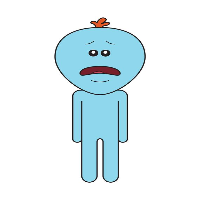

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('000003.jpg')
img_resized = cv2.resize(img, (200,200)) # SMALL DISTORTION are WELCOME! 
cv2_imshow(img_resized)

In [ ]:
img_resized[0] # EACH element is a LIST of 3 elements -> CHANNEL value-> 3 channels
img_resized.shape

(200, 200, 3)

In [ ]:
img_resized[5][0] # 5th row, 0th column

# uint8 -> each channel is unsigned (no negative signs) and 8 bit in size 

array([255, 255, 255], dtype=uint8)

In [ ]:
import numpy as np
from keras import backend # backend -> tf/theano etc
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential # no parallel, no cycles 

# TF can create all = DAG, DCG, IAG, ICG 

Using TensorFlow backend.


In [ ]:
# SUCH networks can be VERY large and usually only 1 instance runs 
# otherwise RAM will be cluttered and all will crash! (OS+model+harddisk)

# NO MORE THAN 1 INSTANCE of such programs should be RUNNING! 

# SINGLETON -> class which can have ONLY 1 instance -> TASK MANAGER! 

In [ ]:

 # the method declared after @st... will be STATIC
  # ONLY 1 copy of it will RUN from the beginning till the end of program
  # STATIC keyword -> STATIC MEANS ALWAYS PRESENT (Static CURRENT!)

  # DEPTH = Channel depth = channel dimension = no. of channels 
  #                       
# KERAS needs us to arrange -> IMAGE STRUCTURE 
    # Tensorflow -> CHANNEL_LAST -> (height, width, depth)
    # Theano -> CHANNEL_FIRST -> (depth, height, width)
    # https://machinelearningmastery.com/a-gentle-introduction-to-channels-first-and-channels-last-image-formats-for-deep-learning/


# PandaVGG = ((Conv + ReLU + BN) + MP + Dropout + ( (Conv + ReLU + BN) + MP + Dropout)XN
#             + (Flatten + Dense(ReLu) + Dense(SoftMax))

class PandaVGG:
  @staticmethod
  def build( height, width, depth, classes) :
  
    # let's assume we are on TF, else we will switch to Theano 
    inputShape = (height, width, depth)
    channel_dim = -1  # last element -> CHANNELS_LAST 
    if backend.image_data_format() == 'channels_first':
      inputShape = (depth, height, width)
      channel_dim = 1
    # { data, representation } => [data,representation] or [representation, data]
    #  { images, channels}     => channels_last or channels_first 
    # data -> 2 d images -> height [row], width [columns] 

    HP_block1_conv_dim = 32    
    HP_small_pattern = (3,3)
    HP_block2_conv_dim = 64
    HP_block3_conv_dim = 128
    HP_block4_conv_dim = 256
    HP_block5_dense_dim = 1024
    HP_large_pattern = (2,2)
    HP_dropout_type1 = 0.25
    HP_dropout_type2 = 0.50
    
    model = Sequential()
# PandaVGG = (Conv + ReLU + BN) + MP + Dropout + ((Conv + ReLU + BN)X2 + MP + Dropout) X N
#             + (Flatten + Dense(ReLu) + Dense(SoftMax))

    # block1 starts-> (Conv + ReLU + BN) + MP + Dropout 
    model.add(Conv2D(HP_block1_conv_dim, HP_small_pattern, padding='same', input_shape=inputShape))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim)) # our data needs to be normalized, not our channels!!!
    model.add(MaxPooling2D(pool_size=HP_small_pattern))
    model.add(Dropout(HP_dropout_type1))
    # block1 complete 

    #block2 starts -> (Conv + RelU + BN) X2   + Compress + Drop 
    model.add(Conv2D(HP_block2_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(HP_block2_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_large_pattern))
    model.add(Dropout(HP_dropout_type1))
    # BLock 2 ends 

    #Block3 starts
    model.add(Conv2D(HP_block3_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(HP_block3_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_large_pattern))
    model.add(Dropout(HP_dropout_type1))
    # block3 ends

    #Block4 starts
    model.add(Conv2D(HP_block4_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(HP_block4_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_large_pattern))
    model.add(Dropout(HP_dropout_type1))
    # block4 ends

    # final block5- classification/prediction
    model.add(Flatten())
    model.add(Dense(HP_block5_dense_dim))
    model.add(Activation('relu'))
    # optional: Batch Normalization and Dropout -> to avoid overfitting 
    model.add(BatchNormalization())
    model.add(Dropout(HP_dropout_type2))
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    # final block ends

    return model




In [ ]:
 # minimum image sizes that NN can clearly identify
# black & white images                          -> 28X28 
# multi-channels images (3 channels in our case)-> 96X96 (3 X (32,32)) 

model = PandaVGG.build(96, 96, 3, 3)
model.summary() 

# 32 filters -> each filter is 3X3 -> PER CHANNEL
# 1 filter = [ [w11,w12,w13],[w21,w22,w23],[w31,w32,w33]] -> 9 weights 
# 32 X 9 = 288 -> 1 channel

# 288 X 3 = 864 weights
# 32 filters generated, each with 1 bias
# weights + bias = 864 + 32 = 896

# EXPORT the built model -> right approach 
# next file-> train.py -> import the model 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)       

In [ ]:
# data_clean.py 
# in real life, should have been a separate file
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
from sklearn.preprocessing import LabelBinarizer # Label encoding, 1-hot encoding, multi-encoding
# LABEL binarizer is a 1-hot encoded MATRIX 
import cv2
import numpy as np
import random
import imutils
from imutils import paths
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from sklearn.model_selection import train_test_split


In [ ]:
# if this was a User Facing software or web/mobile app, we would have been using a UI
HP_dataset = 'data'
HP_model_path = 'bin/model'
HP_binarized_labels = 'bin/labels'
HP_metrics_storage = 'eval'
HP_test_dataset = 'test'
HP_epoch = 100
HP_init_lr = 1e-3 # learning_rate = 0.001
HP_batch_size = 32
HP_image_dim = (96,96,3)

In [ ]:
data = []
labels = [] 
# read all images
all_images = sorted(list(paths.list_images(HP_dataset)))
all_images[:5]

['data/dogs/00001.png',
 'data/dogs/00005.png',
 'data/dogs/00087.png',
 'data/dogs/00120.png',
 'data/dogs/00132.png']

In [ ]:
random.seed(42)
random.shuffle(all_images)
all_images[:5]

['data/pikachu/00000015.jpg',
 'data/shaktiman/Shaktiman 00000071.jpg',
 'data/shaktiman/Shaktiman 00000148.jpg',
 'data/pikachu/00000134.png',
 'data/pikachu/00000067.jpg']

In [ ]:
import os
for impath in all_images:
  img = cv2.imread(impath)
  resized = cv2.resize(img, (HP_image_dim[0],HP_image_dim[1]) )
  imageData = img_to_array(resized)
  data.append(imageData)
  # extract label from filename (2nd last element) / \\ 
  label = impath.split(os.path.sep)[-2]
  labels.append(label)

print(labels[0])
#print(data[0])


pikachu


In [ ]:
 # BATCH NORMALIZATION FUN FACT 
    # we will be calculating -> mu and sigma for normalization 
    # parameters will be generated
    # but in back/prop-> IS my data(images) changing? if my data is not changing
    # then mu and sigma for that data/batch will not change!!! 
    # Non-TRAINABLE parameters -> that cannot be trained -> back-prop's differentiation 
    # will NOT change their value! 

In [ ]:
# https://1drv.ms/u/s!AhM-uOEWdqAeqG9rJT9XKZp62sCj?e=hl5sKg
# https://1drv.ms/u/s!AhM-uOEWdqAexWFgIl-sNiHnq0JM?e=V3cG4m

# Pattern Recognition: pattern recognition by Sergios Theodoridis, Konstantinos

In [ ]:
# CONVOLUTIONAL neural networks + Recurring Networks + Lot of unknown stuff = Brain

In [ ]:
# Color theory: https://www.springer.com/gp/book/9780792399285

# Concious / Unconcious -> myth 
# Cerebrum, Cerebellum, Corpus callosum, medulla -> Biologist 
# biologist and neurologist -> CLASSFIED brains into activities
# 
# They are now proven to be partial knowledges!

# Optical nerve was working fine but postoral lobe responsible for
# vision was damaged 

# Neurosurgeons -> clipped optical nerve and connected to a different segment of brain
# within matter of months, BRAIN taught itself to SEE from the area where it was not supposed
# to! 

# BRAIN -> Weights and BIASES and unknown parameters! 

In [ ]:
from keras.applications.vgg16 import VGG16

model = VGG16()
model.summary()

553467904/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________